[[  8.08932279]
 [245.71014804]] [[  -6.9462859 ]
 [-250.32746333]]
[[ 0.95311606 -0.04742695]
 [-0.04742695  0.2224854 ]]
[[ 0.92290008 -0.00458605]
 [-0.00458605  0.10968387]]
sw_inverse:    [[0.53536869 0.08383116]
 [0.08383116 3.02364002]]
w: [[  49.63300144]
 [1501.09962735]]
Threshold [-8764.30986067  -228.39829228]
sum: 993
accuracy_score 99.3
f_score 0.9929929929929929


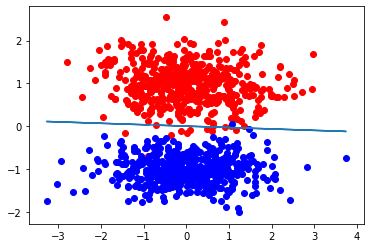

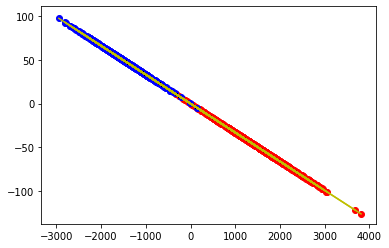

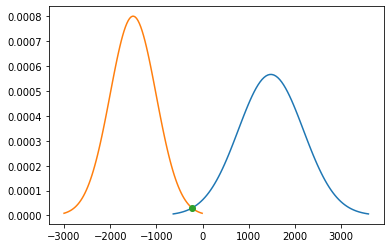

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm



def F_score(y_pred,Y):
    #Computing F-score
    true_positive=np.sum(np.logical_and((y_pred==Y),(y_pred==1)))
    true_negative=np.sum(np.logical_and((y_pred==Y),(y_pred==0)))
    false_positive=np.sum(np.logical_and((y_pred!=Y),(y_pred==1)))
    false_negative=np.sum(np.logical_and((y_pred!=Y),(y_pred==0)))
    precision=true_positive/(true_positive+false_positive)
    recall=true_positive/(true_positive+false_negative)
    f_score=2*(precision*recall)/(precision+recall)
    return f_score
    #print('f_score',f_score)



def solve(m1,m2,std1,std2):
  a = 1/(2*std1**2) - 1/(2*std2**2)
  b = m2/(std2**2) - m1/(std1**2)
  c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
  return np.roots([a,b,c])

def accuracy_score(c,t):
    return (c/t)*100
  
#Fisher's Linear Discriminant for a1_d1
df=pd.read_csv('a1_d1.csv', header=None)
df.columns=['x1','x2','y']
X=df.drop(columns='y')
Y=df['y']
df.to_numpy()
#print(df)
m1=[]
x1_c1=[] 
x2_c1=[]
x1_c2=[] 
x2_c2=[]
i=0
for i in range(len(df)):
    if df.iloc[i,2]==1:
        x1_c1.append(df.iloc[i,0])
        x2_c1.append(df.iloc[i,1])
        i=i+1
    elif df.iloc[i,2]==0:
        x1_c2.append(df.iloc[i,0])
        x2_c2.append(df.iloc[i,1])
        i=i+1


x1_c1=np.array(x1_c1)
x2_c1=np.array(x2_c1)  
x1_c2=np.array(x1_c2)
x2_c2=np.array(x2_c2)
x_c1=(x1_c1,x2_c1)
x_c1=np.array(x_c1)
x_c2=(x1_c2,x2_c2)
x_c2=np.array(x_c2)
sum_1=(x1_c1.sum(),x2_c1.sum()) 
sum_1=np.array(sum_1)
m1=np.array(m1)
m1=(1/len(x_c1))*(sum_1) #Mean of Class c1 i.e belonging to class 1
m1=m1.reshape(-1,1)

sum_2=(x1_c2.sum(),x2_c2.sum()) 
sum_2=np.array(sum_2)
m2=(1/len(x_c2))*(sum_2) #Mean of Class c2
m2=np.array(m2)
m2=m2.reshape(-1,1)
print(m1, m2)
#print((((x_c1.T)[0].reshape(-1,1)-m1).dot((((x_c1.T)[0].reshape(-1,1)-m1).T))).shape)
# Now, we compute within class covariance matrix
s1=np.cov(x_c1)
s2=np.cov(x_c2)
print(s1)
print(s2)
sw=s1+s2
sw=np.array(sw)
#sw_inverse
sw_inverse= np.linalg.inv(sw)
print(f"sw_inverse:    {sw_inverse}")

#Finding the optimal direction
w=sw_inverse.dot(m1-m2)
print(f"w: {w}")
#print(w.shape)

#coverted 2d to 1D points
x_c1_1d=(w.T).dot(x_c1)
x_c2_1d=(w.T).dot(x_c2)
x=pd.concat([pd.DataFrame(x_c1_1d),pd.DataFrame(x_c2_1d)],axis=0)
(w1,w2)=w
m=-(w1/w2)


#finding the threshold
mean_c1=np.mean(x_c1_1d)
var_c1=np.var(x_c1_1d)
mean_c2=np.mean(x_c2_1d)
var_c2=np.var(x_c2_1d)
sigma1 = np.sqrt(var_c1)
sigma2 = np.sqrt(var_c2)
threshold=solve(mean_c1,mean_c2,sigma1,sigma2)
print('Threshold',threshold)

#converting data 2d to 1D
x_1d_t=(X).dot(w)
x_1d_t=np.array(x_1d_t)
i=0
y_pred=[]
for i in range(len(x_1d_t)):
    if (x_1d_t[i])>threshold[1]:
        y_pred.append(1)
    elif x_1d_t[i]<threshold[1]:
        y_pred.append(0)
    i+=1

y_pred=np.array((y_pred))
Y=np.array(Y)
i=0
sum=0
for i in range(len(y_pred)):
    if y_pred[i]==Y[i]:
        sum+=1
    i=i+1

print('sum:',sum)
#Finding the Accuracy-score after LDA
print('accuracy_score', accuracy_score(sum,len(Y)))
#plotting the 2D points along with the classifier
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x1_c1,x2_c1,c='Red') #belonging to class1
ax1.scatter(x1_c2,x2_c2,c='Blue')
ax1.plot(df.x1, m*(df.x1) )

#plotting transformed points on the line
fig = plt.figure()
ax2 = fig.add_subplot(111)
ax2.scatter(x_c1_1d, m*(x_c1_1d), c='Red')
ax2.scatter(x_c2_1d, m*(x_c2_1d), c='Blue')
ax2.plot(np.array(x), m*(np.array(x)),c='y')


#plotting the normal distribution for both the classes and finding the threshold point

x1= np.linspace(mean_c1 - 3*sigma1,mean_c1 + 3*sigma1, 100)
x2 = np.linspace(mean_c2 - 3*sigma2,mean_c2 + 3*sigma2, 100)
fig = plt.figure()
ax3 = fig.add_subplot(111)
ax3.plot(x1, norm.pdf(x1, mean_c1, sigma1))
ax3.plot(x2, norm.pdf(x2, mean_c2, sigma2))
ax3.plot(threshold[1],norm.pdf(threshold[1],mean_c1,sigma1),'o')

#Computing F-score
print('f_score',F_score(y_pred,Y))


[[ 37.18384775]
 [  0.42643146]
 [168.37845316]] [[  17.04913835]
 [  17.22836831]
 [-167.52166603]]
[[8.4444018  0.00952549 0.12606144]
 [0.00952549 0.99261822 0.02692698]
 [0.12606144 0.02692698 0.15425788]]
[[ 9.71467121e+00 -2.07122216e-01  1.18518089e-04]
 [-2.07122216e-01  9.83737616e-01 -1.09759042e-03]
 [ 1.18518089e-04 -1.09759042e-03  2.54690383e-02]]
sw_inverse:    [[ 0.0554112   0.00605983 -0.03977314]
 [ 0.00605983  0.50759661 -0.07720347]
 [-0.03977314 -0.07720347  5.60301539]]
w: [[ -12.34593172]
 [ -34.33924827]
 [1882.5498837 ]]
(3, 1)
(3, 500)
Threshold [-4638.45093157  -733.01961693]
sum: 1000
accuracy_score 100.0
f_score 1.0


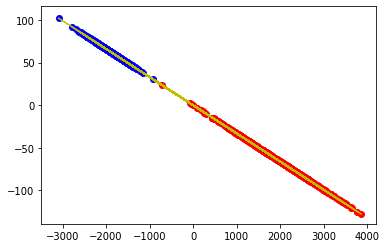

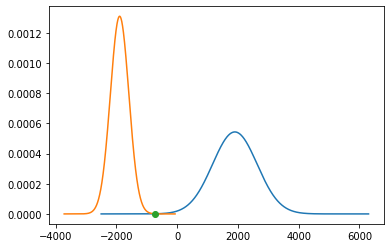

In [8]:
#Fisher's Linear Discriminant for a1_d2
df1=pd.read_csv('a1_d2.csv', header=None)
df1.columns=['x1','x2','x3','y']
x=df1.drop(columns='y')
y=df1['y']
df1.to_numpy()
#print(df1)
x1_c1=[] 
x2_c1=[]
x1_c2=[] 
x2_c2=[]
x3_c2=[]
x3_c1=[]
i=0
for i in range(len(df1)):
    if df1.iloc[i,3]==1:
        x1_c1.append(df1.iloc[i,0])
        x2_c1.append(df1.iloc[i,1])
        x3_c1.append(df1.iloc[i,2])
        i=i+1
    elif df1.iloc[i,3]==0:
        x1_c2.append(df1.iloc[i,0])
        x2_c2.append(df1.iloc[i,1])
        x3_c2.append(df1.iloc[i,2])
        i=i+1
#Converting into NUmpy Arrays
x1_c1=np.array(x1_c1)
x2_c1=np.array(x2_c1)  
x1_c2=np.array(x1_c2)
x2_c2=np.array(x2_c2)
x3_c1=np.array(x3_c1)
x3_c2=np.array(x3_c2)
x_c1=(x1_c1,x2_c1,x3_c1)#Features belonging to class 1
x_c1=np.array(x_c1)
x_c2=(x1_c2,x2_c2,x3_c2)#Features belonging to class 2
x_c2=np.array(x_c2)
sum_1=(x1_c1.sum(),x2_c1.sum(),x3_c1.sum()) 
sum_1=np.array(sum_1)
m1=np.array(m1)
m1=(1/len(x_c1))*(sum_1)#Mean of Class c1 i.e belonging to class 1
m1=m1.reshape(-1,1)

sum_2=(x1_c2.sum(),x2_c2.sum(),x3_c2.sum())  
sum_2=np.array(sum_2)
m2=(1/len(x_c2))*(sum_2) #Mean of Class c2
m2=np.array(m2)
m2=m2.reshape(-1,1)

print(m1,m2)
s1=np.cov(x_c1)
s2=np.cov(x_c2)
print(s1)
print(s2)
sw=s1+s2
sw=np.array(sw)
#sw_inverse
sw_inverse= np.linalg.inv(sw)
print(f"sw_inverse:    {sw_inverse}")

#Finding the optimal direction
w=sw_inverse.dot(m1-m2)
print(f"w: {w}")
print(w.shape)

#coverted 2d to 1D points
x_c1_1d=(w.T).dot(x_c1)
x_c2_1d=(w.T).dot(x_c2)
(w1,w2,w3)=w
print(x_c1.shape)
k=pd.concat([pd.DataFrame(x_c1_1d),pd.DataFrame(x_c2_1d)],axis=0)

#Finding the Threshold
mean_c1=np.mean(x_c1_1d)
var_c1=np.var(x_c1_1d)
mean_c2=np.mean(x_c2_1d)
var_c2=np.var(x_c2_1d)
sigma1 = np.sqrt(var_c1)
sigma2 = np.sqrt(var_c2)
threshold=solve(mean_c1,mean_c2,sigma1,sigma2)
print('Threshold',threshold)

#converting data 2D to 1D
x_1d_t=(x).dot(w)
x_1d_t=np.array(x_1d_t)
i=0
y_pred=[]
for i in range(len(x_1d_t)):
    if (x_1d_t[i])> threshold[1]:
        y_pred.append(1)
    elif x_1d_t[i]< threshold[1]:
        y_pred.append(0)
    i+=1

#print(y_pred)
y_pred=np.array((y_pred))
y=np.array(y)
i=0
sum=0
for i in range(len(y)):
    if y_pred[i]==y[i]:
        sum+=1
    i=i+1

print('sum:',sum)
print('accuracy_score', accuracy_score(sum,len(y)))

#plotting transformed points on the line
fig = plt.figure()
ax2 = fig.add_subplot(111)
ax2.scatter(x_c1_1d, m*(x_c1_1d), c='Red')
ax2.scatter(x_c2_1d, m*(x_c2_1d), c='Blue')
ax2.plot(np.array(k), m*(np.array(k)),c='y')

#plotting the normal distribution for both the classes and finding the threshold point

x1= np.linspace(mean_c1 - 6*sigma1,mean_c1 + 6*sigma1, 1000)
x2 = np.linspace(mean_c2 - 6*sigma2,mean_c2 + 6*sigma2, 1000)
fig = plt.figure()
ax3 = fig.add_subplot(111)
ax3.plot(x1, norm.pdf(x1, mean_c1, sigma1))
ax3.plot(x2, norm.pdf(x2, mean_c2, sigma2))
ax3.plot(threshold[1],norm.pdf(threshold[1],mean_c1,sigma1),'o')

#Computing F-score
print('f_score',F_score(y_pred,y))